# **Tutorial: Data Analysis using Python Pandas**
By: Fateenah Farid and Zachary Smith



In this tutorial, we will explore the usage of Python libraries such as Pandas, NumPy,and Matplotlib to analyze the "LEGO Sets and Themes" dataset to provide insights into the world of LEGO.

### **About the Dataset**

The dataset is obtained from Kaggle (https://www.kaggle.com/datasets/jkraak/lego-sets-and-themes-database).

This dataset is a comprehensive dataset containing attributes such as set number, set name, theme category, the count of pieces included, release year, and a visual representation of each set from 1949 to 2023.

In this tutorial, we are going to **analyze the LEGO Sets and Themes Database**, in order to obtains answers for the following questions:
1. On average, how many LEGO sets are released every year?

2. Which LEGO themes has the highest number of sets?

3. What are the top 10 years that has the highest number of LEGO sets released?

4. What are the top 5 LEGO themes with the highest number of sets?

5. What are the top 5 LEGO themes with the smallest number of sets?

6. What are the top 10 LEGO sets with the highest number of parts?

7. What are the top 10 LEGO sets with the lowest number of parts?


#### By the end of this tutorial, you should be able to:
- Create distributions of a data set

- Find ranges of a variety of data

- Manipulate data to give a certain value

## Steps To Perform Data Analysis

### Step 1: Importing Data and Libraries
- This is the most crucial step as you have to import external data that you will analyze, as well as any Python libraries, if needed.

Import the required libraries that you will be using. In this tutorial, we are using Pandas, NumPy and Matplotlib.

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Then, import your dataset that is in .csv format into the Pandas DataFrame

In [106]:
data = pd.read_csv('/workspaces/Project2/data/lego_sets_and_themes.csv')

### Step 2: Reading data
- It is important that we read and explore the data before performing any cleaning and analyzation.
- It helps you to understand the structure of the data, including its variables, formats, and any missing values.

**data.columns** - Retrieve the column names of the dataframe

In [107]:
data.columns 

Index(['set_number', 'set_name', 'year_released', 'number_of_parts',
       'image_url', 'theme_name'],
      dtype='object')

**data.head()** - Display the first 5 rows of the dataframe

In [108]:
data.head()

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
0,001-1,Gears,1965.0,43.0,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985.0,210.0,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic
3,1038-1,ERBIE the Robo-Car,1985.0,120.0,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic
4,1039-1,Manual Control Set 1,1986.0,39.0,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic


**data.tail()** - Display the last 5 rows of the dataframe

In [109]:
data.tail()

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
21498,71039-4,The Werewolf,2023.0,0.0,https://cdn.rebrickable.com/media/sets/71039-4...,Marvel Series 2
21499,71039-5,She-Hulk,2023.0,0.0,https://cdn.rebrickable.com/media/sets/71039-5...,Marvel Series 2
21500,71039-6,Hawkeye,2023.0,0.0,https://cdn.rebrickable.com/media/sets/71039-6...,Marvel Series 2
21501,71039-7,Kate Bishop,2023.0,0.0,https://cdn.rebrickable.com/media/sets/71039-7...,Marvel Series 2
21502,71039-8,Goliath,2023.0,0.0,https://cdn.rebrickable.com/media/sets/71039-8...,Marvel Series 2


**data.shape** - Retrieve the dimensions of a dataframe. In other words, it will tell you the number of rows and columns of the dataframe

In [110]:
data.shape

(21503, 6)

**data.describe()** - Generate descriptive statistics of a dataframe. It will return statistics such as count, mean, standard deviation, minimum, 1st quartile, median, 3rd quartile and maximum.

In [111]:
data.describe()

,year_released,number_of_parts
count,21496.000000,21496.000000
mean,2007.579782,162.461760
std,13.980685,417.187521
min,1949.000000,0.000000
25%,2001.000000,4.000000
50%,2012.000000,32.000000
75%,2018.000000,142.000000
max,2023.000000,11695.000000


**data.dtypes** - Display the datatypes of each column in the dataframe

In [112]:
data.dtypes

set_number          object
set_name            object
year_released      float64
number_of_parts    float64
image_url           object
theme_name          object
dtype: object

### Step 3: Cleaning and Preparing Data
- Data cleaning is also important to perform before you start analyzing your data as it involves identifying and correcting errors or inconsistencies in datasets to improve their quality and reliability. 
- Data preparation will shape the data in a way that is conducive to the specific analysis or modeling task. This may involve creating new features, aggregating data, or reformatting variables to better suit the requirements of the analysis or modeling technique.

**data.isnull().sum()** - Check for missing values in a dataframe

- isnull() is used to identify missing or NA values in the DataFrame. It will return True for each corresponding element that is missing.

- sum() is used to sum the True values along each column. Since True is interpreted as 1 and False as 0 when summing, the result is a Series containing the total number of missing values for each column.

In [113]:
data.isnull().sum()

set_number         7
set_name           7
year_released      7
number_of_parts    7
image_url          7
theme_name         0
dtype: int64

>> We can see from the given output that the above columns have null values.

**data.dropna()** - Remove rows containing missing values (NaN) from a DataFrame. It is important that we eliminate rows that contains incomplete information so our analysis stays accurate. 

- We set the parameter condition to how = "all" because this parameter specifies that a row will be dropped only if all the specified columns have missing values. If any of the specified columns has a non-missing value, the row will be retained.

- We also set the parameter condition to subset = [columns names with null values] so that only the specified columns will be examined for missing values.

- The parameter condition inplace = True is used to modify the DataFrame in place, meaning that the changes will be applied to the existing DataFrame data, and it won't return a new DataFrame.

In [114]:
data.dropna(how="all", subset = ['set_number','set_name','year_released','number_of_parts','image_url'],inplace=True)
data.isnull().sum()

set_number         0
set_name           0
year_released      0
number_of_parts    0
image_url          0
theme_name         0
dtype: int64

**data.duplicated().sum()** - Count the number of duplicated rows in the dataframe

In [115]:
data.duplicated().sum()

0

 **data.sort_values()** - Sort a dataframe by specified columns

In [116]:
data.sort_values('theme_name')

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
4726,7745-1,High-Speed City Express Passenger Train,1985.0,737.0,https://cdn.rebrickable.com/media/sets/7745-1.jpg,12V
4697,702-1,12V Motor with Accessories Pack,1969.0,27.0,https://cdn.rebrickable.com/media/sets/702-1.jpg,12V
4698,703-1,12V Replacement Electric Motor,1969.0,1.0,https://cdn.rebrickable.com/media/sets/703-1.jpg,12V
4699,704-1,12V Sleeper (Track) Contacts for Old Motor Typ...,1969.0,2.0,https://cdn.rebrickable.com/media/sets/704-1.jpg,12V
4700,705-1,Motor Bushings,1969.0,4.0,https://cdn.rebrickable.com/media/sets/705-1.jpg,12V
...,...,...,...,...,...,...
17410,3264-1,Tez,2001.0,9.0,https://cdn.rebrickable.com/media/sets/3264-1.jpg,Zooters
17411,3265-1,Wazo,2001.0,6.0,https://cdn.rebrickable.com/media/sets/3265-1.jpg,Zooters
14195,9680-1,"Energy Work, Power Starter Set",1999.0,792.0,https://cdn.rebrickable.com/media/sets/9680-1.jpg,eLAB
14196,9681-1,eLAB Renewable Energy Set,1999.0,713.0,https://cdn.rebrickable.com/media/sets/9681-1.jpg,eLAB


### Step 4: Analyzing and Visualizing Data
- Now that we have cleaned and prepared our data, it's time to analyze it.
- After analyzing the data, we then visualize it into graphs.

1. On average, how many LEGO sets are released every year?

The average amount of sets released every year is 294 sets.


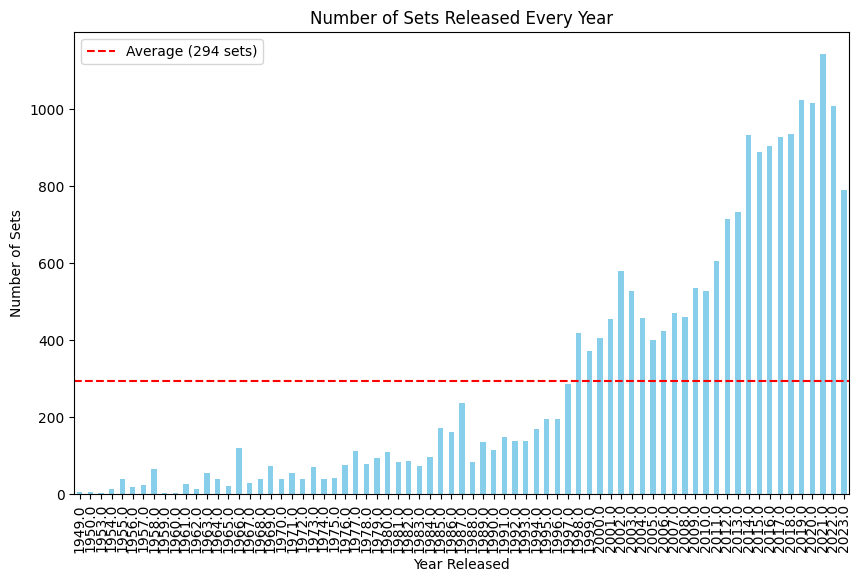

In [117]:
# Calculate the average number of sets released every year
avg_sets = int(data.groupby('year_released').size().mean())

# Print results
print(f"The average amount of sets released every year is {avg_sets} sets.")

# Plotting the data
plt.figure(figsize=(10, 6))
data.groupby('year_released').size().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Year Released')
plt.ylabel('Number of Sets')
plt.title('Number of Sets Released Every Year')

# Adding a horizontal line for the average
plt.axhline(y=avg_sets, color='red', linestyle='--', label=f'Average ({avg_sets} sets)')

# Adding legend
plt.legend()

# Show the plot
plt.show()

2. Which LEGO themes has the highest number of sets?

LEGO themes with the highest number of sets is Star Wars.


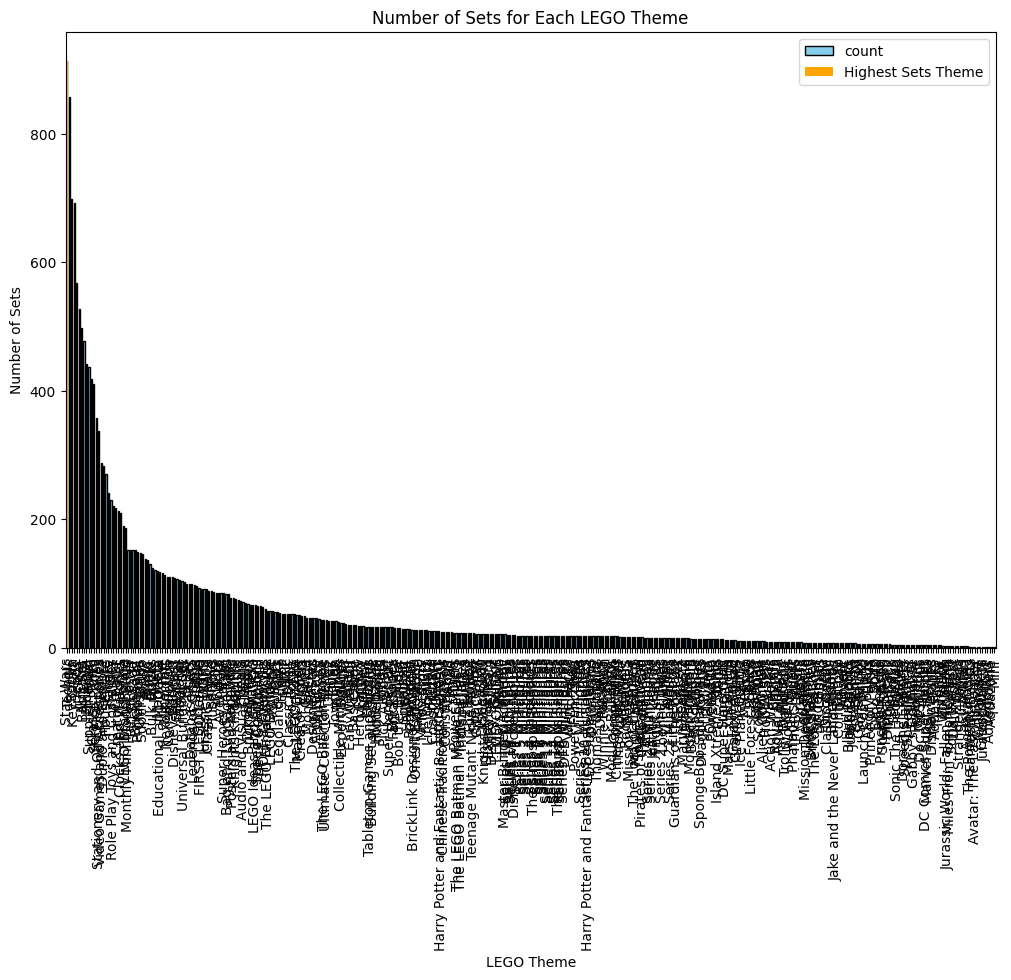

In [118]:
# Count the number of sets for each LEGO theme
theme_counts = data['theme_name'].value_counts()

# Find the theme with the highest number of sets
highest_sets_theme_id = theme_counts.idxmax()

# Get the count of sets for the theme with the highest number
highest_sets_count = theme_counts.max()

# Print result
print(f"LEGO themes with the highest number of sets is {highest_sets_theme_id}.")

# Plotting the data
plt.figure(figsize=(12, 8))
theme_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight the theme with the highest number of sets
plt.bar(highest_sets_theme_id, highest_sets_count, color='orange', label='Highest Sets Theme')

# Adding labels and title
plt.xlabel('LEGO Theme')
plt.ylabel('Number of Sets')
plt.title('Number of Sets for Each LEGO Theme')

# Adding legend
plt.legend()

# Show the plot
plt.show()

3. What are the top 10 years that has the highest number of LEGO sets released?

Top ten years with the most LEGO sets:
Year: 2021, Sets: 1142
Year: 2019, Sets: 1023
Year: 2020, Sets: 1014
Year: 2022, Sets: 1008
Year: 2018, Sets: 934
Year: 2014, Sets: 931
Year: 2017, Sets: 928
Year: 2016, Sets: 904
Year: 2015, Sets: 888
Year: 2023, Sets: 790


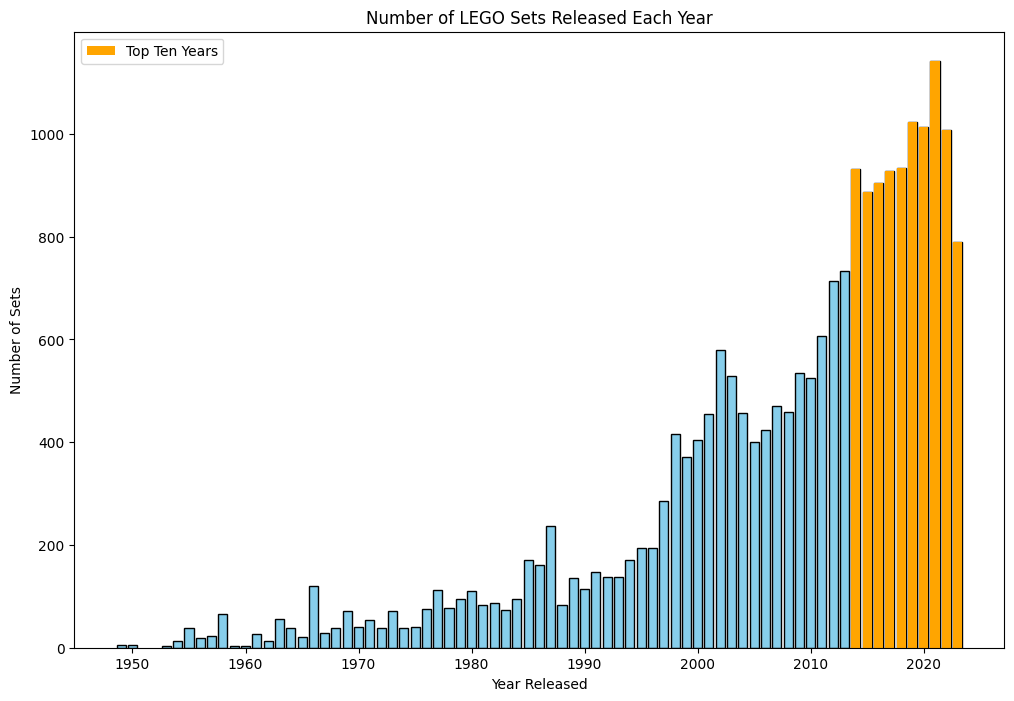

In [119]:
# Count the number of LEGO sets for each year
year_counts = data['year_released'].value_counts()

# Extract years and counts as NumPy arrays
years = year_counts.index.to_numpy()
counts = year_counts.to_numpy()

# Find the indices of the top ten years based on set counts
top_ten = np.argsort(counts)[::-1][:10]

# Extract the top ten years and their corresponding counts
top_ten_years = years[top_ten]
top_ten_counts = counts[top_ten]

# Print result
print("Top ten years with the most LEGO sets:")
for year, count in zip(top_ten_years, top_ten_counts):
    print(f"Year: {year:.0f}, Sets: {count:.0f}")

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(years, counts, color='skyblue', edgecolor='black')

# Highlight the top ten years
plt.bar(top_ten_years, top_ten_counts, color='orange', label='Top Ten Years')

# Adding labels and title
plt.xlabel('Year Released')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Sets Released Each Year')

# Adding legend
plt.legend()

# Show the plot
plt.show()

4. What are the top 5 LEGO themes with the highest number of sets?

Top 5 LEGO themes with the highest number of sets:
theme_name
Star Wars    913
Technic      857
Books        699
Key Chain    693
Friends      568
Name: count, dtype: int64


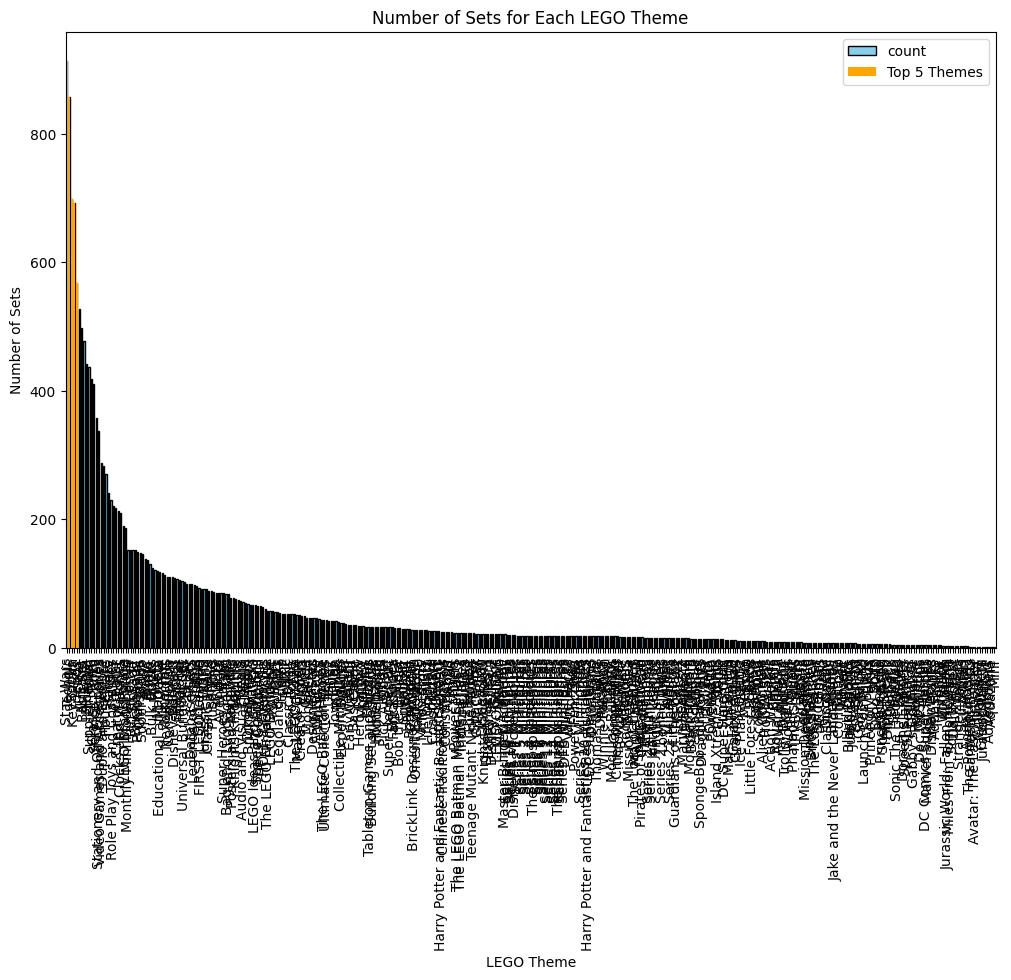

In [120]:
# Count the number of sets for each LEGO theme
theme_counts = data['theme_name'].value_counts()

# Select the top 5 themes with the highest number of sets
top5_high_sets = theme_counts.nlargest(5)

# Print result
print("Top 5 LEGO themes with the highest number of sets:")
print(top5_high_sets)

# Plotting the data
plt.figure(figsize=(12, 8))
theme_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight the top 5 themes
plt.bar(top5_high_sets.index, top5_high_sets.values, color='orange', label='Top 5 Themes')

# Adding labels and title
plt.xlabel('LEGO Theme')
plt.ylabel('Number of Sets')
plt.title('Number of Sets for Each LEGO Theme')

# Adding legend
plt.legend()

# Show the plot
plt.show()

5. What are the top 5 LEGO themes with the smallest number of sets?

Top 5 LEGO themes with the smallest number of sets are as follows:
theme_name
Legoland               1
Adventurers            1
Aquazone               1
Mini                   1
The Powerpuff Girls    2
Name: count, dtype: int64


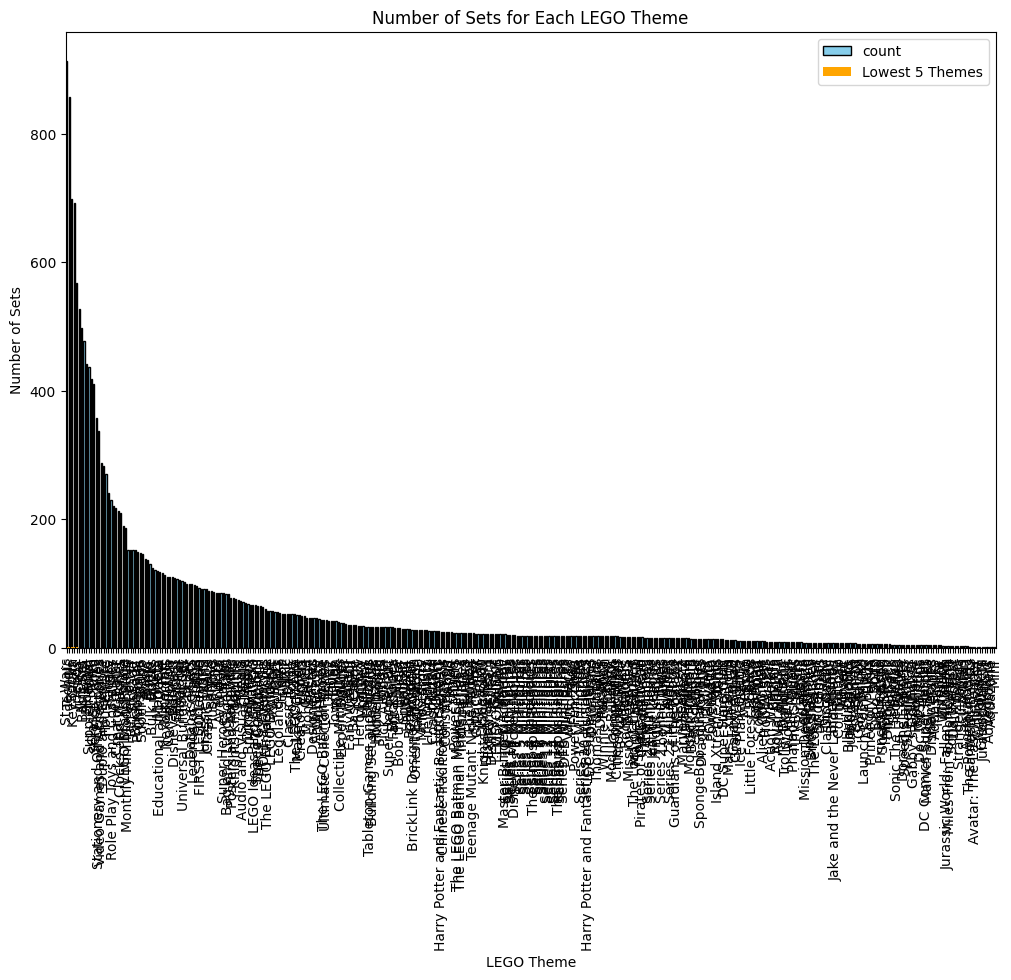

In [121]:
# Count the number of sets for each LEGO theme
theme_counts = data['theme_name'].value_counts()

# Select the top 5 themes with the smallest number of sets
low5_high_sets = theme_counts.nsmallest(5)

print("Top 5 LEGO themes with the smallest number of sets are as follows:")
print(low5_high_sets)

# Plotting the data
plt.figure(figsize=(12, 8))
theme_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight the top 5 themes with the smallest number of sets
plt.bar(low5_high_sets.index, low5_high_sets.values, color='orange', label='Lowest 5 Themes')

# Adding labels and title
plt.xlabel('LEGO Theme')
plt.ylabel('Number of Sets')
plt.title('Number of Sets for Each LEGO Theme')

# Adding legend
plt.legend()

# Show the plot
plt.show()

6. What are the top 10 LEGO sets with the highest number of parts?

Top 10 LEGO sets with the highest number of parts are as follows:
                     set_name  number_of_parts
                    World Map          11695.0
                 Eiffel Tower          10001.0
The Ultimate Battle for Chima           9987.0
                      Titanic           9092.0
                    Colosseum           9036.0
            Millennium Falcon           7541.0
                        AT-AT           6785.0
              The Razor Crest           6194.0
 Lord of the Rings: Rivendell           6182.0
         NINJAGO City Markets           6163.0


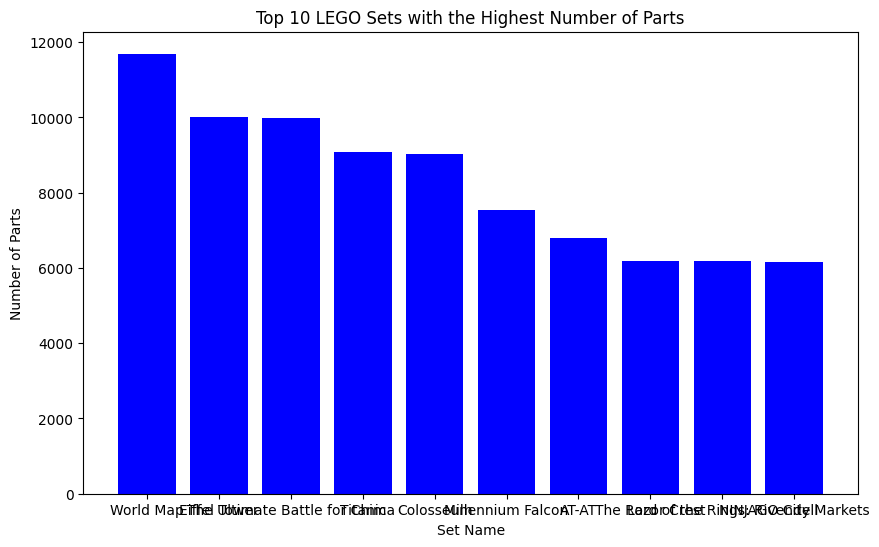

In [122]:
# Find the top 10 LEGO sets with the highest number of parts
top_10_sets = data.nlargest(10, 'number_of_parts')

# Print result
print("Top 10 LEGO sets with the highest number of parts are as follows:")
print(top_10_sets[['set_name','number_of_parts']].to_string(index = False))

# Create a figure with a specific size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Create a bar chart for the top 10 LEGO sets with the highest number of parts
plt.bar(top_10_sets['set_name'], top_10_sets['number_of_parts'], color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Set Name')
plt.ylabel('Number of Parts')

# Add a title to the chart
plt.title('Top 10 LEGO Sets with the Highest Number of Parts')

# Display the chart
plt.show()

7. What are the top 10 LEGO sets with the lowest number of parts?

Top 10 LEGO sets with the smallest number of parts are as follows:
                                                    set_name  number_of_parts
                                    Technic Racer Collection              0.0
Dumper and Front End Loader Co-Pack (contains 8451 and 8453)              0.0
                                Technic Kettenbagger-Co-pack              0.0
                                   Technic Super Pack 4 in 1              0.0
                                   Technic Super Pack 4 in 1              0.0
                                   Technic Super Pack 4 in 1              0.0
                                   Technic Super Pack 3 in 1              0.0
                                      Monster Jam Collection              0.0
                               Kabaya Technic Vehicle 4-Pack              0.0
                           Competition Racers with Stopwatch              0.0


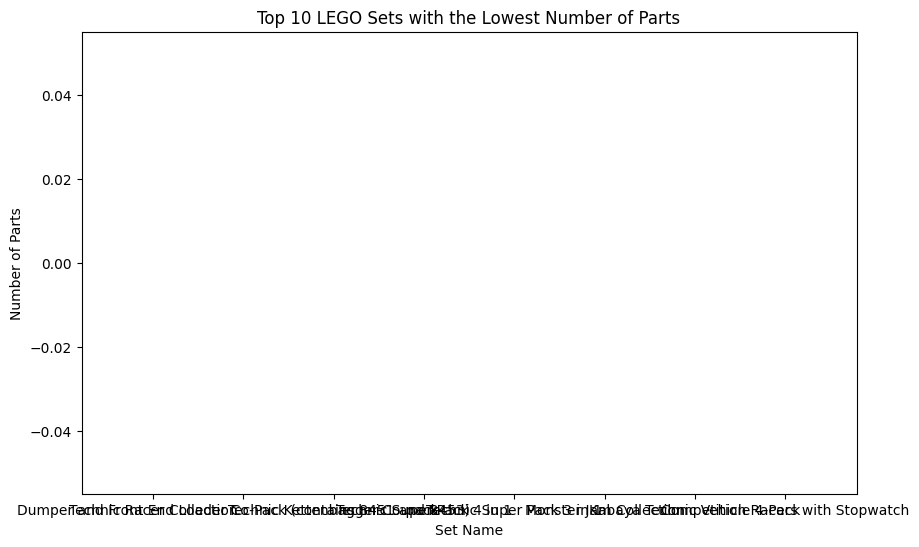

In [123]:
# Find the top 10 LEGO sets with the smallest number of parts.
low_10_sets = data.nsmallest(10, 'number_of_parts')

# Print result
print("Top 10 LEGO sets with the smallest number of parts are as follows:")
print(low_10_sets[['set_name','number_of_parts']].to_string(index = False))

# Create a figure with a specific size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Create a bar chart for the bottom 10 LEGO sets with the lowest number of parts
plt.bar(low_10_sets['set_name'], low_10_sets['number_of_parts'], color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Set Name')  # Label for the x-axis (LEGO set names)
plt.ylabel('Number of Parts')  # Label for the y-axis (Number of parts in LEGO sets)

# Add a title to the chart
plt.title('Top 10 LEGO Sets with the Lowest Number of Parts')  # Chart title

# Display the chart
plt.show()

### Conclusion

We have solved a comprehensive data analysis example, taking step-by-step actions. These included importing data into the DataFrame, analyzing and gaining insights into the data's characteristics, and analyzing and plotting data to find answers to specific queries. This preparation enabled us to analyze the data and derive answers to the posed questions. Additionally, we visualized the outcomes of our data analysis. 